### Hermite interpolation with divided differences

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
  return np.sin(x)
def f_prime(x):
  return np.cos(x)

In [7]:
def hermite_div_diff(x,node_x,node_y,node_y_prime):
  '''Build the Hermite osculating polynomial using the divided difference approach

  :param x: locations where to evaluate the resulting Hermite polynomial
  :type x: numpy array of doubles
  :param node_x: x coordinate of the locations to interpolate
  :type node_x: list or numpy array of doubles
  :param node_y: values f(x) to interpolate
  :type node_y: list or numpy array of doubles
  :param node_y_prime: values of the first derivative f'(x) to construct the osculating polynomial
  :type node_y_prime: list or numpy array of doubles
  :return: the osculating Hermite polynomial at the locations x
  :rtype: numpy array of doubles
  '''
  n = len(node_x)-1
  # Initialize storage matrix
  z = np.zeros(2*n+2)
  Q = np.zeros((2*n+2,2*n+2))

  # Fill the first two columns of the Q matrix with the 
  # zero-th and first order divided differences
  for i in range(n+1):
    # Set the z sequecne
    z[2*i] = node_x[i]
    z[2*i+1] = node_x[i]
    # The first column of Q has the function values
    Q[2*i,0] = node_y[i]
    Q[2*i+1,0] = node_y[i]
    # The second column has the derivatives every other entry
    Q[2*i+1,1] = node_y_prime[i]
    if(i != 0):
      Q[2*i,1] = (Q[2*i,0]-Q[2*i-1,0])/(z[2*i]-z[2*i-1])
  
  # Complete the matrix with the other divided differences
  for i in range(2,2*n+2):
    for j in range(2,i+1):
      Q[i,j] = (Q[i,j-1]-Q[i-1,j-1])/(z[i]-z[i-j])

  # Generate the interpolating polynomial
  poly = np.zeros(len(x))
  for i in range(2*n+2):
    # Compute the product of the x
    prod_x = 1.0
    for j in range(i):
      prod_x *= (x-z[j])
    poly += Q[i,i]*prod_x
  # Return the polynomial
  return poly

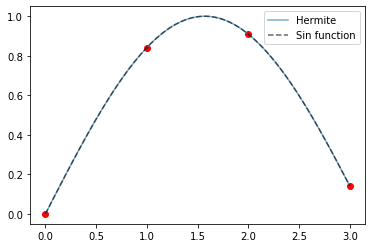

In [8]:
# Get values and derivatives from function f
node_x = np.array([0,1.0,2.0,3.0])
node_y = f(node_x)
node_y_prime = f_prime(node_x)

# Set the x values
x = np.linspace(0,3,100)
sf_id = 2

plt.plot(node_x,f(node_x),'ro')
plt.plot(x,hermite_div_diff(x,node_x,node_y,node_y_prime),label='Hermite',alpha=0.6)
plt.plot(x,f(x),'k--',label='Sin function',alpha=0.6)
plt.legend()
plt.show()